In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from numerical_characteristics import DiscreteCharacteristics
from collections import Counter
from scipy import stats

In [80]:
df = pd.read_csv('NBA_2004_2023_Shots.csv')
df

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2023,2022-23,1610612764,Washington Wizards,203078,Bradley Beal,G,SG,10-19-2022,22200004,...,Left Corner 3,Left Side,L,24+ ft.,23.4,12.95,24,1,11,20
1,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,Above the Break 3,Center,C,24+ ft.,-0.4,31.45,26,1,10,52
2,2023,2022-23,1610612764,Washington Wizards,1628420,Monte Morris,G,PG,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,-1.3,5.25,1,1,10,39
3,2023,2022-23,1610612764,Washington Wizards,204001,Kristaps Porzingis,C,C,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,-0.1,7.25,2,1,10,31
4,2023,2022-23,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,10-19-2022,22200004,...,Restricted Area,Center,C,Less Than 8 ft.,1.8,7.15,2,1,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012556,2004,2003-04,1610612755,Philadelphia 76ers,2422,John Salmons,G,SG,10-28-2003,20300001,...,Left Corner 3,Left Side,L,24+ ft.,23.3,9.55,23,1,11,21
4012557,2004,2003-04,1610612759,San Antonio Spurs,1938,Manu Ginobili,G,SG,10-28-2003,20300002,...,Above the Break 3,Left Side Center,LC,24+ ft.,15.1,25.85,25,1,11,24
4012558,2004,2003-04,1610612747,Los Angeles Lakers,406,Shaquille O'Neal,C,C,10-28-2003,20300003,...,In The Paint (Non-RA),Center,C,Less Than 8 ft.,-4.7,9.85,6,1,11,39
4012559,2004,2003-04,1610612756,Phoenix Suns,2063,Jake Voskuhl,C,C,10-28-2003,20300002,...,Restricted Area,Center,C,Less Than 8 ft.,-2.3,6.05,2,1,11,42


In [81]:
westbrook = df[df['PLAYER_NAME'] == 'Russell Westbrook']
westbrook

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
116365,2023,2022-23,1610612747,Los Angeles Lakers,201566,Russell Westbrook,G,PG,10-18-2022,22200002,...,Restricted Area,Center,C,Less Than 8 ft.,2.1,6.95,2,1,7,40
116366,2023,2022-23,1610612747,Los Angeles Lakers,201566,Russell Westbrook,G,PG,10-18-2022,22200002,...,Above the Break 3,Center,C,24+ ft.,-7.0,29.35,25,1,6,59
116375,2023,2022-23,1610612747,Los Angeles Lakers,201566,Russell Westbrook,G,PG,10-18-2022,22200002,...,Restricted Area,Center,C,Less Than 8 ft.,-0.9,6.55,1,1,1,43
116395,2023,2022-23,1610612747,Los Angeles Lakers,201566,Russell Westbrook,G,PG,10-18-2022,22200002,...,In The Paint (Non-RA),Center,C,Less Than 8 ft.,4.7,11.45,7,2,4,59
116396,2023,2022-23,1610612747,Los Angeles Lakers,201566,Russell Westbrook,G,PG,10-18-2022,22200002,...,Restricted Area,Center,C,Less Than 8 ft.,0.7,6.25,1,2,4,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032069,2009,2008-09,1610612760,Oklahoma City Thunder,201566,Russell Westbrook,G,PG,10-29-2008,20800010,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,8,52
3032078,2009,2008-09,1610612760,Oklahoma City Thunder,201566,Russell Westbrook,G,PG,10-29-2008,20800010,...,Mid-Range,Left Side,L,8-16 ft.,12.5,13.05,14,4,9,34
3032809,2009,2008-09,1610612760,Oklahoma City Thunder,201566,Russell Westbrook,G,PG,10-29-2008,20800010,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,2,3,48
3032960,2009,2008-09,1610612760,Oklahoma City Thunder,201566,Russell Westbrook,G,PG,10-29-2008,20800010,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.25,0,2,6,21


In [82]:
westbrook.columns

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')

In [83]:
distance = Counter(westbrook['SHOT_DISTANCE'])
distance = dict(distance)
distance = dict(sorted(distance.items()))
distance

{0: 2514,
 1: 2606,
 2: 1724,
 3: 713,
 4: 452,
 5: 374,
 6: 304,
 7: 279,
 8: 254,
 9: 304,
 10: 331,
 11: 395,
 12: 436,
 13: 571,
 14: 592,
 15: 687,
 16: 788,
 17: 778,
 18: 727,
 19: 561,
 20: 314,
 21: 174,
 22: 228,
 23: 328,
 24: 1305,
 25: 1229,
 26: 580,
 27: 230,
 28: 96,
 29: 39,
 30: 20,
 31: 9,
 32: 5,
 33: 3,
 34: 5,
 35: 4,
 36: 5,
 37: 3,
 38: 1,
 39: 2,
 40: 3,
 41: 2,
 42: 2,
 43: 2,
 44: 1,
 46: 1,
 49: 2,
 50: 1,
 51: 3,
 52: 2,
 53: 1,
 64: 1,
 68: 1,
 69: 1,
 77: 1}

In [84]:
#fga = field goal attempts
fga = len(westbrook['SHOT_DISTANCE'])


In [85]:
distance_probability = distance.copy()
for key, value in distance_probability.items():
    # do something with value
    distance_probability[key] = distance[key]/fga
distance_probability

{0: 0.1257377213163949,
 1: 0.13033910173051916,
 2: 0.0862258677603281,
 3: 0.03566069820946284,
 4: 0.022606782034610383,
 5: 0.01870561168350505,
 6: 0.015204561368410523,
 7: 0.013954186255876763,
 8: 0.012703811143343003,
 9: 0.015204561368410523,
 10: 0.016554966489946983,
 11: 0.01975592677803341,
 12: 0.021806541962588778,
 13: 0.02855856757027108,
 14: 0.02960888266479944,
 15: 0.03436030809242773,
 16: 0.03941182354706412,
 17: 0.03891167350205062,
 18: 0.03636090827248174,
 19: 0.028058417525257576,
 20: 0.015704711413424027,
 21: 0.008702610783234971,
 22: 0.011403421026307892,
 23: 0.016404921476442933,
 24: 0.06526958087426228,
 25: 0.06146844053215965,
 26: 0.029008702610783234,
 27: 0.011503451035310593,
 28: 0.004801440432129639,
 29: 0.0019505851755526658,
 30: 0.0010003000900270082,
 31: 0.00045013504051215364,
 32: 0.00025007502250675204,
 33: 0.00015004501350405122,
 34: 0.00025007502250675204,
 35: 0.00020006001800540162,
 36: 0.00025007502250675204,
 37: 0.000150

In [86]:
tmp = list(distance_probability.values())
sum(tmp)

1.0

In [87]:
distance_object_to_discover = DiscreteCharacteristics(list(distance_probability.keys()), list(distance_probability.values()))

In [88]:
expectancy = distance_object_to_discover.math_expectancy(distance_object_to_discover.value)
expectancy

11.083274982494745

In [89]:
dispersion = distance_object_to_discover.central_moment(2)
dispersion

90.73493783905904

In [90]:
std = distance_object_to_discover.standard_deviation()
std

9.525488850398128

In [91]:
mgf = distance_object_to_discover.moment_generating_function()
mgf

5.00150045013504e-5*exp(77*t) + 5.00150045013504e-5*exp(69*t) + 5.00150045013504e-5*exp(68*t) + 5.00150045013504e-5*exp(64*t) + 5.00150045013504e-5*exp(53*t) + 0.000100030009002701*exp(52*t) + 0.000150045013504051*exp(51*t) + 5.00150045013504e-5*exp(50*t) + 0.000100030009002701*exp(49*t) + 5.00150045013504e-5*exp(46*t) + 5.00150045013504e-5*exp(44*t) + 0.000100030009002701*exp(43*t) + 0.000100030009002701*exp(42*t) + 0.000100030009002701*exp(41*t) + 0.000150045013504051*exp(40*t) + 0.000100030009002701*exp(39*t) + 5.00150045013504e-5*exp(38*t) + 0.000150045013504051*exp(37*t) + 0.000250075022506752*exp(36*t) + 0.000200060018005402*exp(35*t) + 0.000250075022506752*exp(34*t) + 0.000150045013504051*exp(33*t) + 0.000250075022506752*exp(32*t) + 0.000450135040512154*exp(31*t) + 0.00100030009002701*exp(30*t) + 0.00195058517555267*exp(29*t) + 0.00480144043212964*exp(28*t) + 0.0115034510353106*exp(27*t) + 0.0290087026107832*exp(26*t) + 0.0614684405321596*exp(25*t) + 0.0652695808742623*exp(24*t)

In [92]:
rm_mgf = distance_object_to_discover.raw_moment_from_mgf(1)
rm_mgf

11.083274982494745

In [93]:
cf = distance_object_to_discover.characteristic_function()
cf

5.00150045013504e-5*exp(77*I*t) + 5.00150045013504e-5*exp(69*I*t) + 5.00150045013504e-5*exp(68*I*t) + 5.00150045013504e-5*exp(64*I*t) + 5.00150045013504e-5*exp(53*I*t) + 0.000100030009002701*exp(52*I*t) + 0.000150045013504051*exp(51*I*t) + 5.00150045013504e-5*exp(50*I*t) + 0.000100030009002701*exp(49*I*t) + 5.00150045013504e-5*exp(46*I*t) + 5.00150045013504e-5*exp(44*I*t) + 0.000100030009002701*exp(43*I*t) + 0.000100030009002701*exp(42*I*t) + 0.000100030009002701*exp(41*I*t) + 0.000150045013504051*exp(40*I*t) + 0.000100030009002701*exp(39*I*t) + 5.00150045013504e-5*exp(38*I*t) + 0.000150045013504051*exp(37*I*t) + 0.000250075022506752*exp(36*I*t) + 0.000200060018005402*exp(35*I*t) + 0.000250075022506752*exp(34*I*t) + 0.000150045013504051*exp(33*I*t) + 0.000250075022506752*exp(32*I*t) + 0.000450135040512154*exp(31*I*t) + 0.00100030009002701*exp(30*I*t) + 0.00195058517555267*exp(29*I*t) + 0.00480144043212964*exp(28*I*t) + 0.0115034510353106*exp(27*I*t) + 0.0290087026107832*exp(26*I*t) + 0

In [94]:
rm_cf = distance_object_to_discover.raw_moment_from_cf(1)
rm_cf

11.083274982494745

In [95]:
skew = distance_object_to_discover.skewness()
skew

0.34545140062034657

In [96]:
exc = distance_object_to_discover.kurtosis()
exc

2.024290192348151

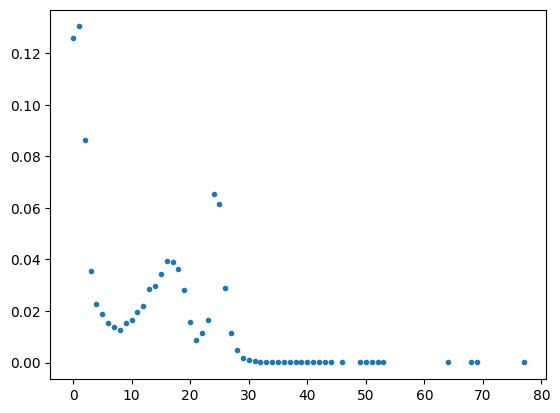

In [97]:
plt.plot(distance_object_to_discover.value, distance_object_to_discover.probability, '.')
plt.show()